In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

In [7]:
file_path = '/content/drive/MyDrive/US_Accidents.csv'

In [8]:
df=pd.read_csv(file_path)

In [10]:
print(df.head(2))

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                   Day  

[2 rows x 46 columns]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [12]:
df.shape

(7728394, 46)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

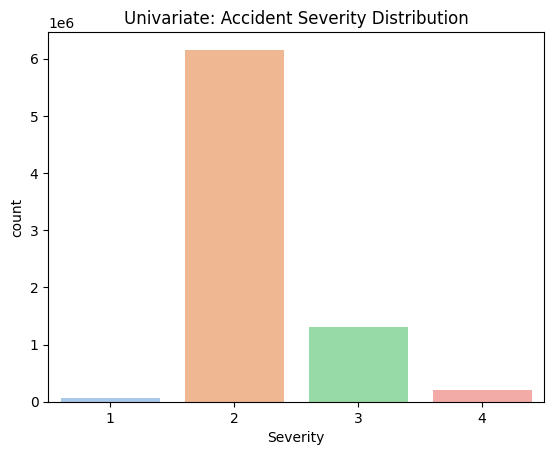

In [14]:
# --- UNIVARIATE ANALYSIS ---
# Distribution of 'Severity' (categorical)
sns.countplot(x='Severity', data=df, palette='pastel')
plt.title('Univariate: Accident Severity Distribution')
plt.show()


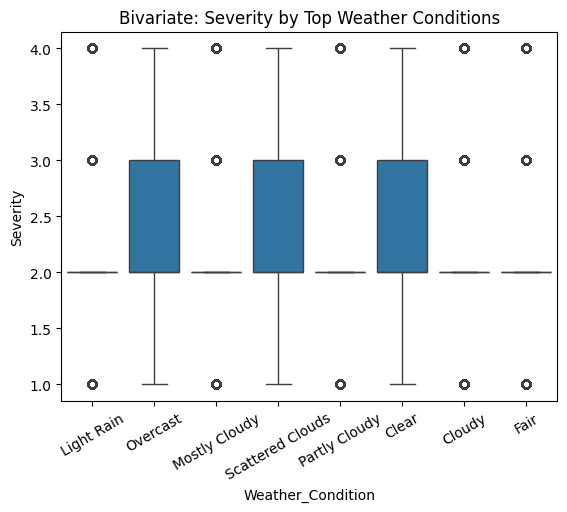

In [15]:
# --- BIVARIATE ANALYSIS ---
# Relationship between Severity and Weather_Condition (categorical vs. categorical)
top_weather = df['Weather_Condition'].value_counts().nlargest(8)
sns.boxplot(x='Weather_Condition', y='Severity',
            data=df[df['Weather_Condition'].isin(top_weather.index)])
plt.title('Bivariate: Severity by Top Weather Conditions')
plt.xticks(rotation=30)
plt.show()


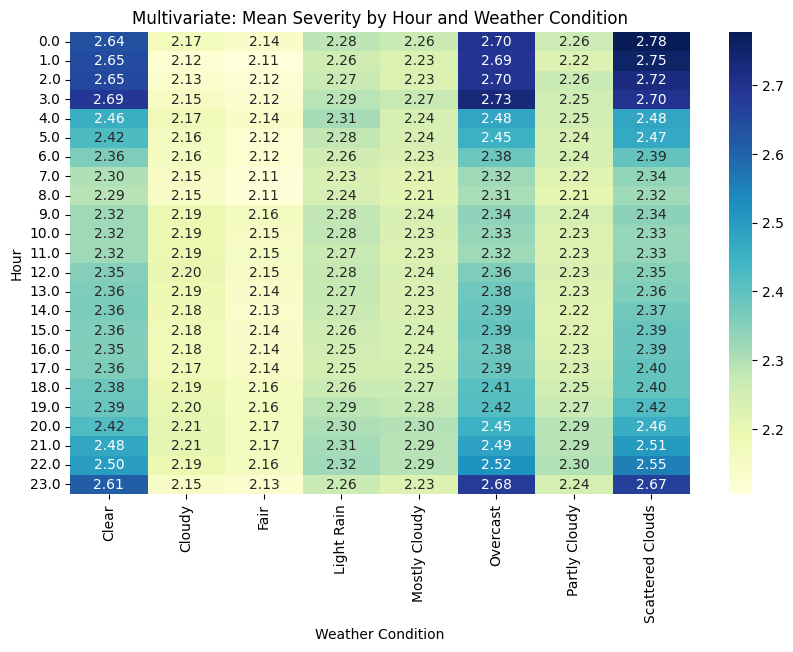

In [16]:
# --- MULTIVARIATE ANALYSIS ---
# Severity by Hour and Top Weather Conditions (heatmap)
if 'Hour' not in df:
    df['Hour'] = pd.to_datetime(df['Start_Time'], errors='coerce').dt.hour
pivot = df[df['Weather_Condition'].isin(top_weather.index)].pivot_table(
    values='Severity', index='Hour', columns='Weather_Condition', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Multivariate: Mean Severity by Hour and Weather Condition')
plt.ylabel('Hour')
plt.xlabel('Weather Condition')
plt.show()


##Basic Statistic

In [17]:
# --- Summary statistics for all numerical columns ---
print("Summary statistics for numerical columns:")
display(df.describe().T)

Summary statistics for numerical columns:


,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


In [18]:
# --- Additional statistics: median for each numerical column ---
print("\nMedian values for numerical columns:")
display(df.median(numeric_only=True))


Median values for numerical columns:


,0
Severity,2.000000
Start_Lat,35.823974
Start_Lng,-87.766616
End_Lat,36.183495
End_Lng,-88.027890
Distance(mi),0.030000
Temperature(F),64.000000
Wind_Chill(F),62.000000
Humidity(%),67.000000
Pressure(in),29.860000



Severity value counts:
Severity
1      67366
2    6156981
3    1299337
4     204710
Name: count, dtype: int64


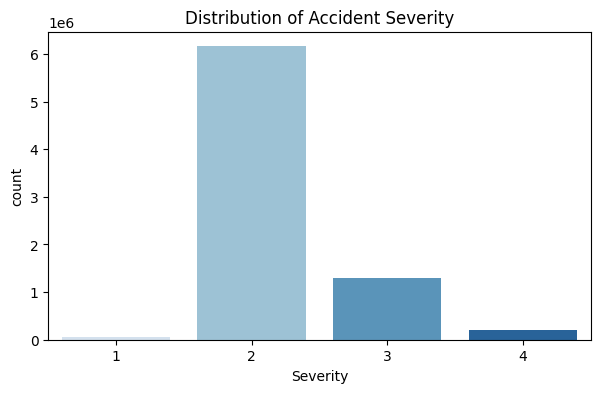

In [19]:
# --- Explore distributions and ranges for key features ---

# 1. Severity
print("\nSeverity value counts:")
print(df['Severity'].value_counts().sort_index())
plt.figure(figsize=(7, 4))
sns.countplot(x='Severity', data=df, palette='Blues')
plt.title('Distribution of Accident Severity')
plt.show()


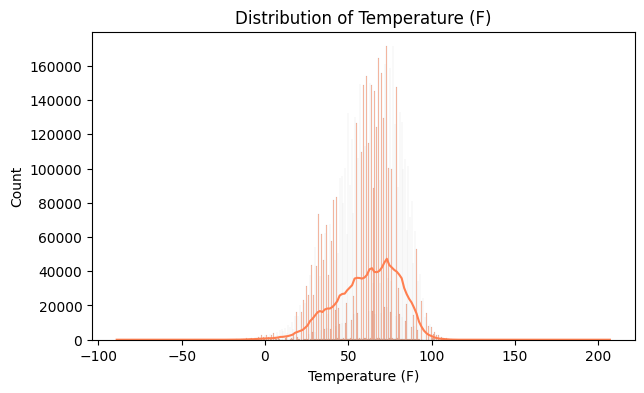

Temperature (F): min = -89.0 | max = 207.0


In [20]:
# 2. Temperature
plt.figure(figsize=(7, 4))
sns.histplot(df['Temperature(F)'].dropna(), kde=True, color='coral')
plt.title('Distribution of Temperature (F)')
plt.xlabel('Temperature (F)')
plt.show()
print("Temperature (F): min =", df['Temperature(F)'].min(),
      "| max =", df['Temperature(F)'].max())


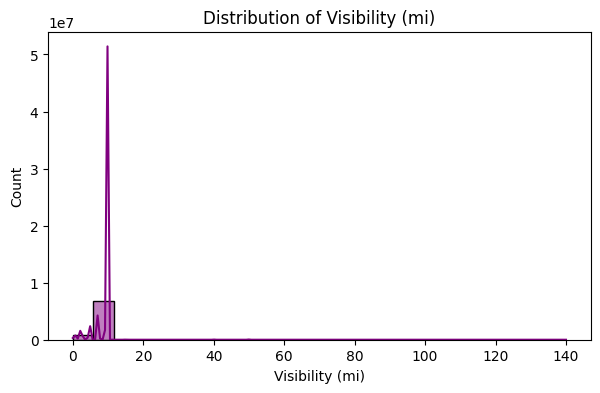

Visibility (mi): min = 0.0 | max = 140.0


In [21]:
# 3. Visibility
plt.figure(figsize=(7, 4))
sns.histplot(df['Visibility(mi)'].dropna(), kde=True, color='purple')
plt.title('Distribution of Visibility (mi)')
plt.xlabel('Visibility (mi)')
plt.show()
print("Visibility (mi): min =", df['Visibility(mi)'].min(),
      "| max =", df['Visibility(mi)'].max())



Most frequent Weather Conditions:
Weather_Condition
Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Name: count, dtype: int64


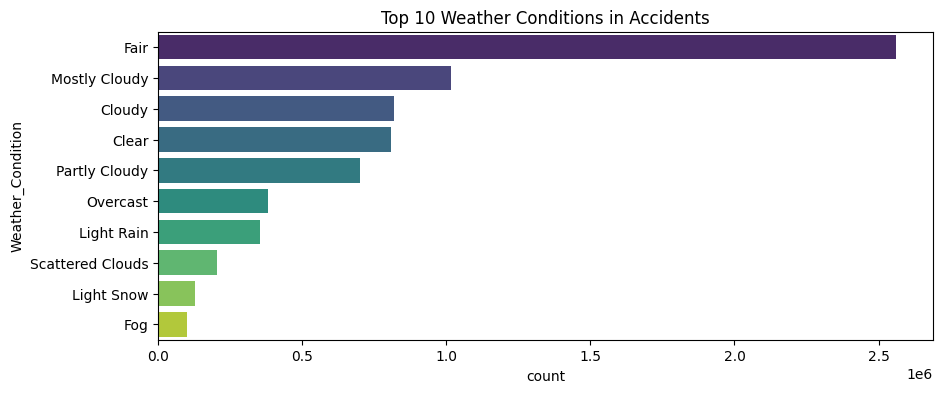

In [22]:
# 5. Explore Weather Condition categories
print("\nMost frequent Weather Conditions:")
print(df['Weather_Condition'].value_counts(dropna=True).head(10))

plt.figure(figsize=(10, 4))
sns.countplot(y='Weather_Condition', data=df,
              order=df['Weather_Condition'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Weather Conditions in Accidents')
plt.show()


In [23]:
# 6. Explore distribution over latitude and longitude (range)
print("\nLatitude range:", df['Start_Lat'].min(), "to", df['Start_Lat'].max())
print("Longitude range:", df['Start_Lng'].min(), "to", df['Start_Lng'].max())


Latitude range: 24.5548 to 49.002201
Longitude range: -124.623833 to -67.113167
